In [1]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import Normalizer
import numpy as np

### Reading files 

In [2]:
arr = os.listdir('C:/Users/Armit/Python/Scripts/Project/100_300')
print(arr)

['101_198928_20_pages.csv', '102_316554_20_pages.csv', '103_281259_20_pages.csv', '104_172287_20_pages.csv', '105_196340_20_pages.csv', '106_155821_20_pages.csv', '107_127023_20_pages.csv', '108_233371_20_pages.csv', '109_175155_20_pages.csv', '110_312484_20_pages.csv', '111_175640_20_pages.csv', '112_103885_20_pages.csv', '113_146652_20_pages.csv', '114_161970_20_pages.csv', '115_34635_20_pages.csv', '116_233398_20_pages.csv', '117_263918_20_pages.csv', '118_147020_20_pages.csv', '119_262712_20_pages.csv', '120_104162_20_pages.csv', '121_266524_20_pages.csv', '122_4098_20_pages.csv', '123_148949_20_pages.csv', '124_14996_20_pages.csv', '125_118048_20_pages.csv', '126_150376_20_pages.csv', '127_218417_20_pages.csv', '128_233867_20_pages.csv', '129_43111_20_pages.csv', '130_9609_20_pages.csv', '131_163068_20_pages.csv', '132_77423_20_pages.csv', '133_244522_20_pages.csv', '134_17133_20_pages.csv', '135_43015_20_pages.csv', '136_221194_20_pages.csv', '137_128882_20_pages.csv', '138_10334

In [34]:
df_lst = []

In [35]:
for file in arr:
    path = 'C:/Users/Armit/Python/Scripts/Project/100_300/'+file
    df = pd.read_csv(str(path), sep='\t', nrows = 1000)
    df['file'] = file
    #print(len(df))
    df_lst += [df.copy()]

In [36]:
df_final = pd.concat(df_lst) 

In [37]:
df_final[1440:1450]

,Unnamed: 0,Game_name,Gamer,Date,Rating,Location,file
440,440,Dune: Imperium,wheeties012,Feb2021,9.0,NaN,102_316554_20_pages.csv
441,441,Dune: Imperium,Danilo Silvestre,Feb2021,8.5,"SãoPaulo,SãoPaulo·Brazil",102_316554_20_pages.csv
442,442,Dune: Imperium,kahley,Feb2021,8.0,NaN,102_316554_20_pages.csv
443,443,Dune: Imperium,cjacques,Feb2021,9.0,"Nashua,NewHampshire·UnitedStates",102_316554_20_pages.csv
444,444,Dune: Imperium,Valk,Feb2021,9.0,"StatenIsland,NewYork·UnitedStates",102_316554_20_pages.csv
445,445,Dune: Imperium,alicelouise58,Feb2021,10.0,Virginia·UnitedStates,102_316554_20_pages.csv
446,446,Dune: Imperium,OlegKlishin,Feb2021,5.0,"Минск,Минскаяобласть·Belarus",102_316554_20_pages.csv
447,447,Dune: Imperium,deresh,Feb2021,9.0,"DrenjeBrdovečko,Zagrebačkažupanija·Croatia",102_316554_20_pages.csv
448,448,Dune: Imperium,CountSatyr,Feb2021,9.0,Switzerland,102_316554_20_pages.csv
449,449,Dune: Imperium,Bewl,Feb2021,9.0,"Bradford,WestYorkshire·UnitedKingdom",102_316554_20_pages.csv


In [38]:
len(df_final)

200000

In [39]:
data = df_final.groupby('file')['file'].count()

In [40]:
data[data<1000]

Series([], Name: file, dtype: int64)

In [41]:
df_final[df_final['Gamer'] == 'Philosoph']

,Unnamed: 0,Game_name,Gamer,Date,Rating,Location,file
431,431,Commands & Colors: Ancients,Philosoph,May2020,10.0,SouthKorea,146_14105_20_pages.csv
652,652,Paths of Glory,Philosoph,Apr2021,6.0,SouthKorea,161_91_20_pages.csv


In [42]:
df_final[df_final.duplicated() == True]

,Unnamed: 0,Game_name,Gamer,Date,Rating,Location,file


### Retrieving location

In [43]:
df_final.drop(['Unnamed: 0'], inplace = True,axis=1)

In [44]:
df_copy = df_final.copy(deep=True)

In [45]:
df_copy['Country'] = df_copy['Location'].str.split('·',expand = True)[1]

In [46]:
df_location = df_copy[(df_copy['Country'].isna()) & (df_copy['Location'].isna() == False)]

In [47]:
df_location['Country'] = df_location['Location']

<ipython-input-47-e56fdea34bf7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_location['Country'] = df_location['Location']


In [48]:
df_country = df_copy[df_copy['Country'].isna() == False]

In [49]:
df_no_location = df_copy[(df_copy['Country'].isna()) & (df_copy['Location'].isna())]

In [50]:
dataframes = [df_location, df_country, df_no_location]

In [51]:
result = pd.concat(dataframes)

In [52]:
len(result)

200000

In [53]:
result.reset_index(inplace = True)

In [54]:
result.drop(['index'], inplace = True,axis=1)

In [73]:
result[result['Game_name'] =='Dune: Imperium'][['Game_name','Gamer','Date','Rating','Country']][230:250]

,Game_name,Gamer,Date,Rating,Country
37765,Dune: Imperium,mcmorris23,Feb2021,8.0,UnitedStates
37766,Dune: Imperium,Dakke,Feb2021,8.5,Belgium
37767,Dune: Imperium,orson9999999,Feb2021,10.0,Japan
37768,Dune: Imperium,crosspunisherX,Feb2021,8.0,UnitedStates
37769,Dune: Imperium,torgoshuffle,Feb2021,10.0,NewZealand
37770,Dune: Imperium,woolblanket,Feb2021,8.3,UnitedStates
37771,Dune: Imperium,Zarovichx,Feb2021,9.0,UnitedStates
37772,Dune: Imperium,ahkat,Feb2021,8.0,UnitedStates
37773,Dune: Imperium,fidgetyrain,Feb2021,8.0,UnitedStates
37774,Dune: Imperium,mdonaldson86,Feb2021,9.0,UnitedStates


### Analysis overview

In [55]:
result.pivot_table(index = 'Country', values = 'Rating', aggfunc ='sum').sort_values(by='Rating', ascending=False)

,Rating
Country,
UnitedStates,441781.8
Canada,89604.1
Germany,75952.4
UnitedKingdom,65448.7
Spain,56748.8
...,...
SaintKittsandNevis,0.0
Montenegro,0.0
Monaco,0.0


In [56]:
count_country = result.pivot_table(index = 'Country', values = 'Rating', aggfunc ='count')
count_country.reset_index(inplace = True)
count_country.sort_values(by='Rating', ascending=False)

,Country,Rating
149,UnitedStates,58088
28,Canada,11656
54,Germany,10002
148,UnitedKingdom,8566
133,Spain,7389
...,...,...
26,Cambodia,0
95,Montenegro,0
94,Monaco,0
3,AkrotiriandDhekelia,0


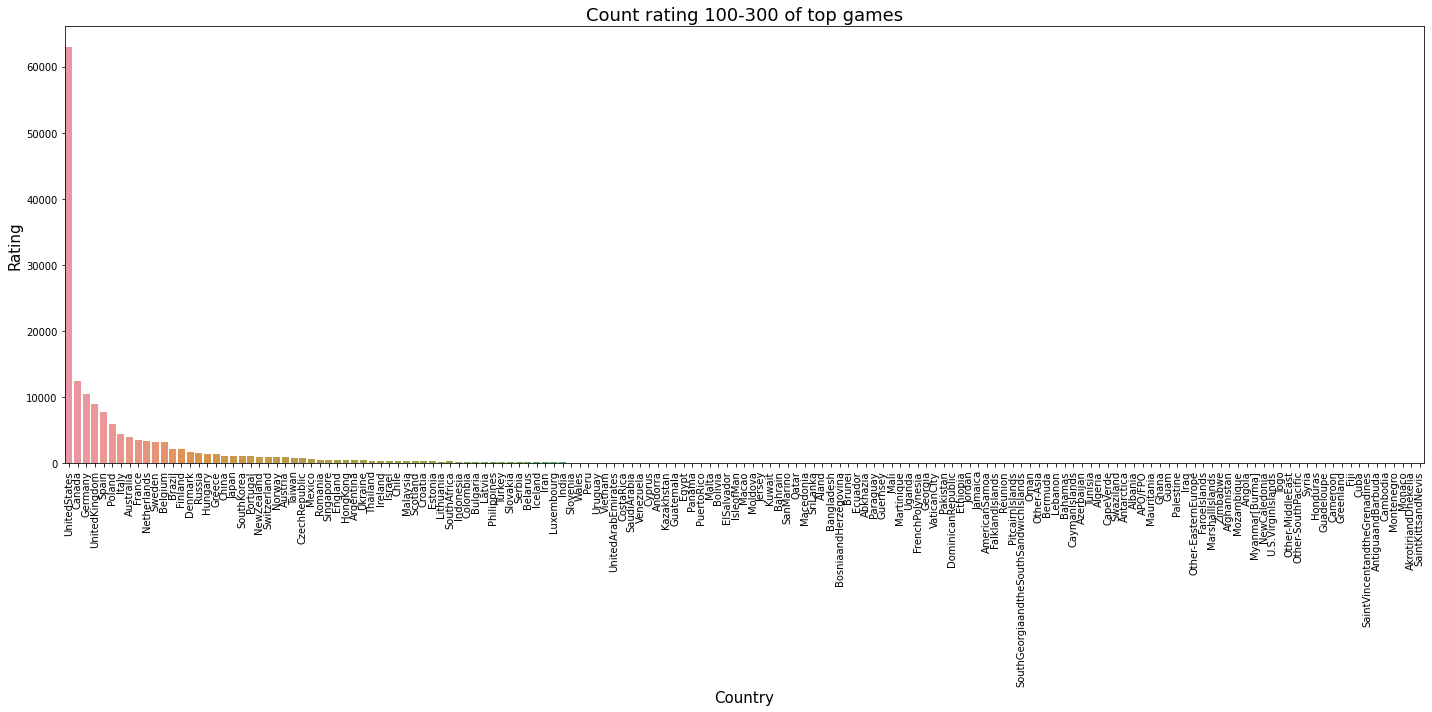

In [57]:
plt.figure(figsize=(20,10))

sns.countplot(x='Country', 
         
            data=result,
           order=count_country.sort_values('Rating',ascending = False).Country)

plt.xlabel("Country", size=15)
plt.ylabel("Rating", size=15)
plt.title("Count rating 100-300 of top games", size=18)
plt.xticks(rotation=90)
plt.tight_layout()

In [58]:
result[result['Country'] == 'Cambodia']

,Game_name,Gamer,Date,Rating,Location,file,Country
19885,Hanamikoji,freedannyv,Oct2018,NaN,Cambodia,207_158600_20_pages.csv,Cambodia
25169,The Manhattan Project: Energy Empire,freedannyv,Oct2018,NaN,Cambodia,235_176734_20_pages.csv,Cambodia


In [59]:
order_game = result.pivot_table(index = 'Game_name', values = 'Rating', aggfunc ='mean')
order_game

,Rating
Game_name,
1830: Railways & Robber Barons,7.840839
1960: The Making of the President,7.627093
51st State: Master Set,7.732455
A Game of Thrones: The Board Game (Second Edition),7.635107
Above and Below,7.403564
...,...
Western Legends,7.608946
Xia: Legends of a Drift System,7.873222
YINSH,7.714668


In [60]:
order_game.reset_index(inplace = True)

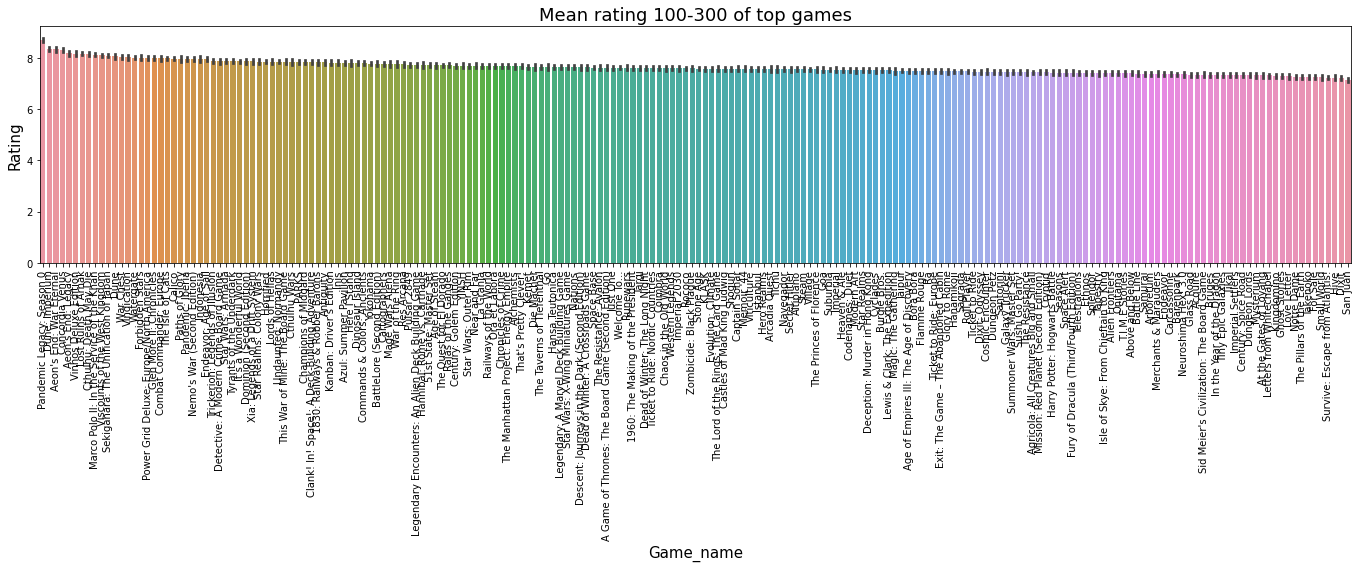

In [61]:
plt.figure(figsize=(19,8))

sns.barplot(x='Game_name', 
            y='Rating', 
            data=result,
           order=order_game.sort_values('Rating',ascending = False).Game_name)

plt.xlabel("Game_name", size=15)
plt.ylabel("Rating", size=15)
plt.title("Mean rating 100-300 of top games", size=18)
plt.xticks(rotation=90)
plt.tight_layout()

In [62]:
order_country = result.pivot_table(index = 'Country', values = 'Rating', aggfunc ='mean')
order_country

,Rating
Country,
APO/FPO,6.500000
Abkhazia,8.388889
Afghanistan,7.000000
Albania,6.250000
Algeria,7.333333
...,...
Venezuela,8.113514
Vietnam,8.088421
Wales,7.383333


In [63]:
order_country.reset_index(inplace = True)

In [64]:
order_country

,Country,Rating
0,APO/FPO,6.500000
1,Abkhazia,8.388889
2,Afghanistan,7.000000
3,Albania,6.250000
4,Algeria,7.333333
...,...,...
146,Venezuela,8.113514
147,Vietnam,8.088421
148,Wales,7.383333
149,Zimbabwe,8.000000


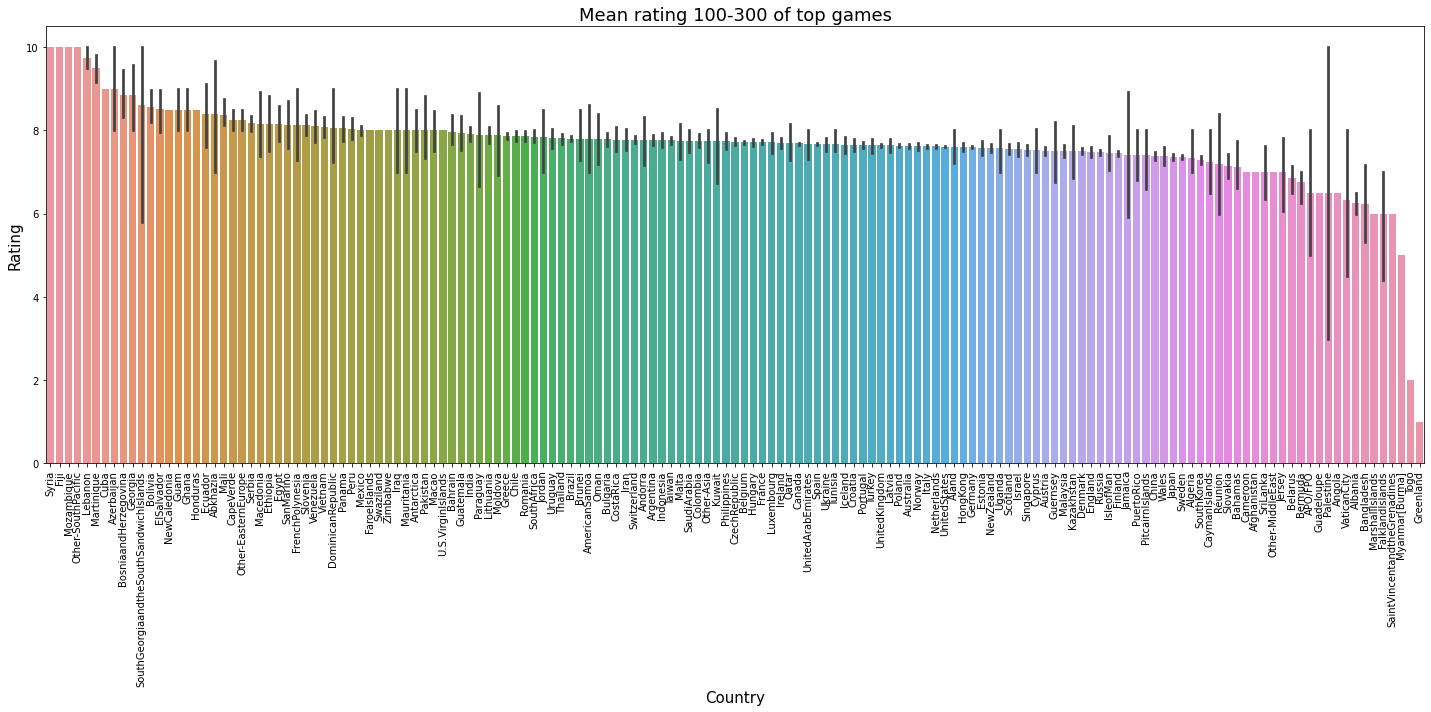

In [65]:
plt.figure(figsize=(20,10))

sns.barplot(x='Country', 
            y='Rating', 
            data=result,
           order=order_country.sort_values('Rating',ascending = False).Country)

plt.xlabel("Country", size=15)
plt.ylabel("Rating", size=15)
plt.title("Mean rating 100-300 of top games", size=18)
plt.xticks(rotation=90)
plt.tight_layout()